### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.3 Function approximation

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [92]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys


In [93]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

(21, 21)


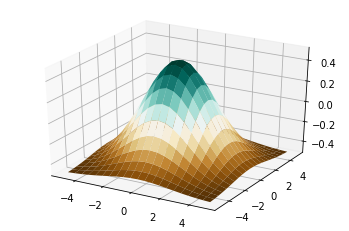

(3, 441)
(10001, 25, 3)
(10001, 1, 26)
-0.2797728270592739
(1, 441)


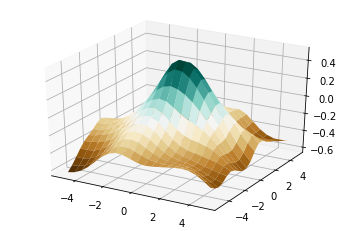

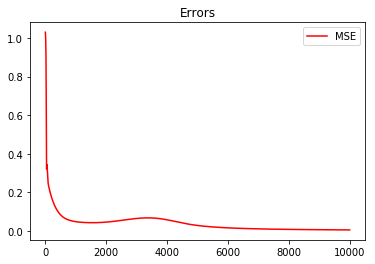

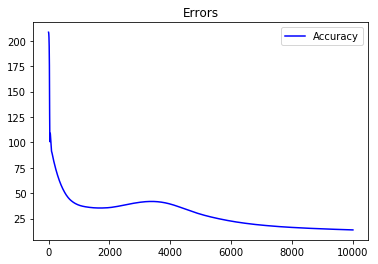

mse
acc


In [94]:


def f(X, Y):
    return np.exp(-X**2*0.1)*np.exp(-Y**2*0.1) - 0.5;

eta = 1e-4
#n_in = 8
n_out = 1
scale = 1
hidden_perceptrons = 25
epochs = 10000


x = np.arange(-5,5.5,0.5)
y = np.arange(-5,5.5,0.5)
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
#print(x.shape)

X, Y = np.meshgrid(x, y)
print(X.shape)
Z = f(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, Z, cmap=cm.BrBG)
plt.show()


ndata = len(x)*len(y)
T = Z.reshape(1,ndata)

patterns = np.vstack([np.reshape(X,(1,ndata)),np.reshape(Y, (1,ndata))])
patterns = np.vstack([patterns,np.ones(patterns.shape[1])])

print(patterns.shape)
W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)

W_train,V_train,mse,acc = backprop(eta,patterns,T,W,V,hidden_perceptrons,epochs)
W_train = np.asarray(W_train)
V_train = np.asarray(V_train)
print(W_train.shape)
print(V_train.shape)
print(V_train[900,0,1])
_, prediction = forward_pass(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
print(prediction.shape)
prediction = prediction.reshape(len(x),len(y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, prediction, cmap=cm.BrBG)
plt.show()
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

print("mse")
#print(mse)
print("acc")
#print(acc)

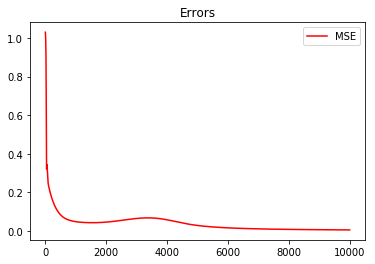

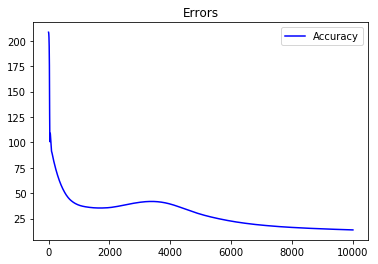

In [95]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()